On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Sheet1.csv")

In [3]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

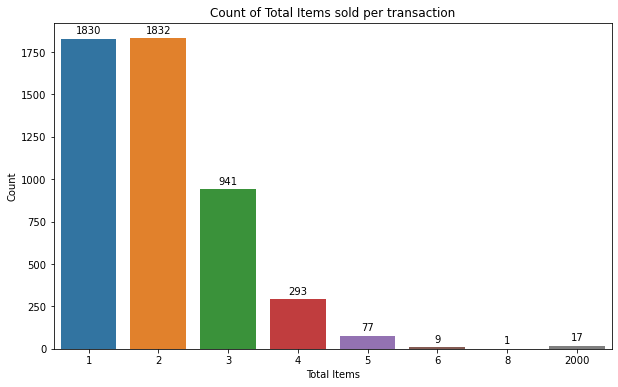

In [5]:
plt.figure(figsize=(10, 6))

fig = sns.countplot(x='total_items', data=data)

for bar in fig.patches:
    fig.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Count of Total Items sold per transaction')
plt.xlabel('Total Items')
plt.ylabel('Count')
plt.show()

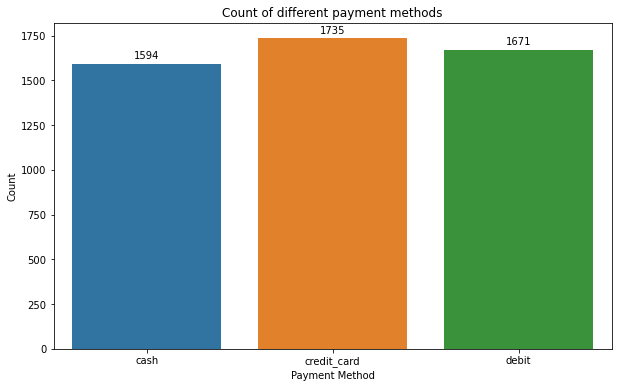

In [6]:
plt.figure(figsize=(10, 6))

fig = sns.countplot(x='payment_method', data=data)

for bar in fig.patches:
    fig.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Count of different payment methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

### **a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

In [7]:
data.shop_id.nunique()

100

**Average order value (AOV)** is the average amount of money each customer spends per transaction with your store. You can calculate your average order value using this simple formula:

                            AOV = Total revenue / number of orders

In [8]:
round(data['order_amount'].mean(), 2)

3145.13

* \\$3145.13 is combined AOV of all the stored for 30 days of period. 
* To increase the AOV of an store, we need to look individually for every store, rather than a cumulative for all the stores.

In [9]:
round(data.groupby('shop_id')['order_amount'].mean().sort_values(ascending=False), 2)

shop_id
42     235101.49
78      49213.04
50        403.55
90        403.22
38        390.86
         ...    
53        214.12
100       213.68
32        189.98
2         174.33
92        162.86
Name: order_amount, Length: 100, dtype: float64

* shop_id(Store) 42 and 78 have the highest AOV \\$235101.49 and \\$49213.04 respectively.
* These two stores have a different distribution or outliers in terms of AOV from other stores, which makes calculation biased towards these two stores.
* So, an ideal approach would be to calculate AOV without considering these two stores for the analysis.

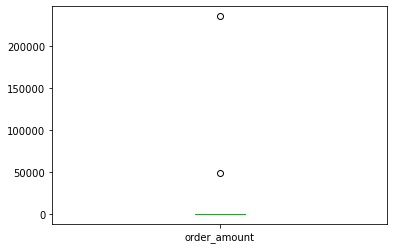

In [10]:
round(data.groupby('shop_id')['order_amount'].mean(), 2).plot(kind='box')
plt.show()

In [11]:
data[(data['shop_id'] == 42) & (data['total_items'] == 2000)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [12]:
data[(data['shop_id'] == 78)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


### **b. What metric would you report for this dataset?**

So, other than AOV there two more metrics which needs to be considered for a better analysis.

1. Average basket value (ABV)
2. Customer lifetime value (CLV)

`Average basket value` is a similar metric to AOV. Rather than measuring how much customers spend per transaction, this number tells you how many items are typically sold per transaction.

`Customer lifetime value` tells you how much each customer is worth over the course of their entire relationship with business, and to calculate this we need average customer lifespan, which is not reported in this dataset. SO for this datset we can't consider CLV.

We can report **Average basket value** and **Average Order Value** on this dataset.

### c. What is its value?


Average Order Value

1. Reason for anomaly for store 42 is that, it sold 2000 sneakers in single transaction at \\$352 per sneaker for 17 transaction.
2. Reason for anomaly for store 78 is that, it has sneakers with high price, \\$25725/sneakers

In [13]:
# index values for all the data points where store_id is 42, 78

indexvalues = data[(data['shop_id'] == 42) | (data['shop_id'] == 78)].index.to_list()

In [14]:
f"There are total {len(indexvalues)} datapoints having store_id 42 and 78"

'There are total 97 datapoints having store_id 42 and 78'

In [15]:
data_update = data.drop(indexvalues)
data_update.reset_index(drop=True, inplace=True)

In [16]:
data_update

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4898,4996,73,993,330,2,debit,2017-03-30 13:47:17
4899,4997,48,789,234,2,cash,2017-03-16 20:36:16
4900,4998,56,867,351,3,cash,2017-03-19 5:42:42
4901,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


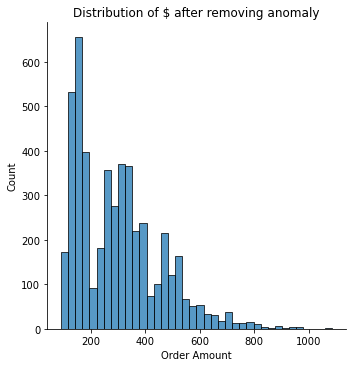

In [17]:
sns.displot(data_update, x="order_amount")

plt.title('Distribution of $ after removing anomaly')
plt.xlabel('Order Amount')
plt.ylabel('Count')
plt.show()

In [18]:
round(data_update['order_amount'].mean(), 2)

300.16

Now, we can see that average order value(AOV) is **\\$300** for 30 days after removing those two stores.

`Average basket value`

In [19]:
data_update.groupby('shop_id')['total_items'].sum().sort_values(ascending=False)

shop_id
13    136
84    132
53    130
71    130
81    128
     ... 
38     72
16     71
44     71
56     69
85     67
Name: total_items, Length: 98, dtype: int64

In [20]:
data_update[data_update['shop_id'] == 13].sort_values(by='total_items', ascending=False).head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4753,4848,13,993,960,6,cash,2017-03-27 11:00:45
1638,1673,13,978,640,4,credit_card,2017-03-10 18:19:29
804,817,13,989,640,4,debit,2017-03-20 13:38:14
2286,2330,13,842,640,4,debit,2017-03-27 8:21:51
4865,4963,13,923,480,3,cash,2017-03-07 2:58:32


In [21]:
data_update[data_update['shop_id'] == 84].sort_values(by='total_items', ascending=False).head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2005,2044,84,721,765,5,credit_card,2017-03-13 2:18:47
441,448,84,789,612,4,cash,2017-03-09 1:31:05
827,842,84,921,612,4,cash,2017-03-28 20:47:07
3023,3085,84,720,612,4,debit,2017-03-07 0:41:57
1901,1938,84,990,459,3,cash,2017-03-15 8:10:20


As, we can see top 2 store, in terms of selling total items/transaction are 13 and 84.